In [15]:
import pandas as pd
import json
from sklearn.preprocessing import LabelEncoder,Binarizer,MinMaxScaler,StandardScaler,normalize


In [16]:
d=pd.read_csv('StudentsPerformance.csv')

print(d)

df=pd.DataFrame(d)

print(df.dtypes)

print(df.describe())

print(df.info())
df=df.iloc[0:500,:]
df=df.drop_duplicates()
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [17]:
def add_students_from_json(json_file_path, df):
    try:

        with open(json_file_path, 'r') as file:
            students_data = json.load(file)


        new_students_df = pd.DataFrame(students_data)


        updated_df = pd.concat([df, new_students_df], ignore_index=True)

        return updated_df
    except FileNotFoundError:
        print(f"Error: The file {json_file_path} does not exist.")
    except json.JSONDecodeError:
        print("Error: The JSON file is not properly formatted.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
df=add_students_from_json('/content/students.json', df)
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
499    male        group E                some college      standard   
500  female        group B           bachelor's degree      standard   
501  female        group A                some college      standard   
502  female        group B             master's degree      standard   
503    male        group A             master's degree  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [20]:
print(df.dtypes)

print(df.describe())

print(df.info())
df.drop_duplicates(inplace=True)
print(df)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
       math score  reading score  writing score
count  504.000000     504.000000     504.000000
mean    65.742063      68.587302      67.271825
std     15.062657      14.812020      15.367840
min      0.000000      17.000000      10.000000
25%     57.000000      58.000000      57.000000
50%     66.000000      70.000000      68.000000
75%     76.000000      79.000000      78.000000
max    100.000000     100.000000     100.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                     

In [21]:
df.rename(columns={'race/ethnicity': 'ethnicity'}, inplace=True)
encoder = LabelEncoder()
df['rank_gender']= df['gender'].rank(method="dense")


df['test preparation course'] = df['test preparation course'].str.replace("none", "not completed").str.lower()
df['lunch'] = df['lunch'].str.replace("free/reduced", "free").str.lower()
print(df)
df['ethnicity']=df['ethnicity'].str.replace("group ","")
print(df)
print(df['parental level of education'].value_counts(dropna=False))

print(df)
df['Total score']=df['math score']+df['reading score']+df['writing score']
print(df)
binarizer = Binarizer(threshold=150)
df['passed'] = binarizer.fit_transform(df.loc[:,['Total score']])
print(df)
mm_scaler = MinMaxScaler(feature_range=(0,100))
df['Total score']= mm_scaler.fit_transform(df.loc[:,['Total score']]).astype('int16')
print(df)



eth= {
    "A": 1,
    "B": 2,
    "C": 3,
    "D": 4,
    "E": 5
}

df['ethnicity_1'] = df['ethnicity'].map(eth)
df['parental level of education'].replace({"some college": "college", "some high school": "high school","associate's degree":'advanced Diploma'}, inplace=True)
education_order = {

    "high school": 1,
    "college": 2,
    "advanced Diploma": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}
df['parental level of education'] = df['parental level of education'].map(education_order)
encoder = LabelEncoder()
df['lunch_num'] = encoder.fit_transform(df.loc[:,['lunch']])
df['test0c,1n'] = encoder.fit_transform(df.loc[:,['test preparation course']])
print(df)

     gender ethnicity parental level of education     lunch  \
0    female   group B           bachelor's degree  standard   
1    female   group C                some college  standard   
2    female   group B             master's degree  standard   
3      male   group A          associate's degree      free   
4      male   group C                some college  standard   
..      ...       ...                         ...       ...   
499    male   group E                some college  standard   
500  female   group B           bachelor's degree  standard   
501  female   group A                some college  standard   
502  female   group B             master's degree  standard   
503    male   group A             master's degree      free   

    test preparation course  math score  reading score  writing score  \
0             not completed          72             72             74   
1                 completed          69             90             88   
2             not comple

<ipython-input-21-b7da35f18d6e>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parental level of education'].replace({"some college": "college", "some high school": "high school","associate's degree":'advanced Diploma'}, inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.1

In [24]:
col=['math score','reading score','writing score','Total score']
'''
for i in col:  # Check if the column is numerical
        print(f'corr {i} with gender :{df["rank_gender"].corr(df[i])}')
        print(f'corr {i} with parental level of education:{df["parental level of education"].corr(df[i])}')
        print(f'corr {i} with ethnicity:{df["ethnicity_1"].corr(df[i])}')
        print(f'corr {i} with lunch:{df["lunch_num"].corr(df[i])}')
        print(f'corr {i} with test preparation course:{df["test0c,1n"].corr(df[i])}')'''
print(df.groupby(['ethnicity'])['passed'].sum())
print(df.groupby(['gender'])['passed'].sum())

ethnicity
A     34
B     88
C    142
D    116
E     61
Name: passed, dtype: int64
gender
female    228
male      213
Name: passed, dtype: int64


In [25]:
print(df)
df.to_json("students_cleaned.json",orient="records")


     gender ethnicity  parental level of education     lunch  \
0    female         B                            4  standard   
1    female         C                            2  standard   
2    female         B                            5  standard   
3      male         A                            3      free   
4      male         C                            2  standard   
..      ...       ...                          ...       ...   
499    male         E                            2  standard   
500  female         B                            4  standard   
501  female         A                            2  standard   
502  female         B                            5  standard   
503    male         A                            5      free   

    test preparation course  math score  reading score  writing score  \
0             not completed          72             72             74   
1                 completed          69             90             88   
2           

In [26]:
import multiprocessing

In [27]:
def calculate_correlation(column_name):
    return {f'corr {column_name} with gender': df['rank_gender'].corr(df[column_name]),
            f'corr {column_name} with parental level of education': df['parental level of education'].corr(df[column_name]),
            f'corr {column_name} with ethnicity': df['ethnicity_1'].corr(df[column_name]),
            f'corr {column_name} with lunch': df['lunch_num'].corr(df[column_name]),
            f'corr {column_name} with test preparation course': df['test0c,1n'].corr(df[column_name])}


In [30]:
if __name__ == "__main__":
    pool = multiprocessing.Pool(processes=4)
    # Start asynchronous tasks for each column using apply_async
    async_results = [pool.apply_async(calculate_correlation, args=(column,)) for column in col]
    r1 = pool.apply_async(calculate_correlation,args=('math score',)) #apply
    r2 = pool.apply_async(calculate_correlation,args=('reading score',))
    r3 = pool.apply_async(calculate_correlation,args=('writing score',))
    r4 = pool.apply_async(calculate_correlation,args=('Total score',))
    # Close the pool and wait for the tasks to finish
    pool.close()
    pool.join()
    print(r1.get())
    print(r2.get())
    print(r3.get())
    print(r4.get())


{'corr math score with gender': 0.1262671306557086, 'corr math score with parental level of education': 0.1622375369573491, 'corr math score with ethnicity': 0.2137319122631659, 'corr math score with lunch': 0.37640271581750123, 'corr math score with test preparation course': -0.17429763855429384}
{'corr reading score with gender': -0.27778395088316193, 'corr reading score with parental level of education': 0.20495991713269326, 'corr reading score with ethnicity': 0.1329675248131939, 'corr reading score with lunch': 0.2591402298230939, 'corr reading score with test preparation course': -0.2390308511625668}
{'corr writing score with gender': -0.33353744420982034, 'corr writing score with parental level of education': 0.24690689384238323, 'corr writing score with ethnicity': 0.16429525223769084, 'corr writing score with lunch': 0.2768301405236474, 'corr writing score with test preparation course': -0.2985917619693505}
{'corr Total score with gender': -0.17054318260769277, 'corr Total sco

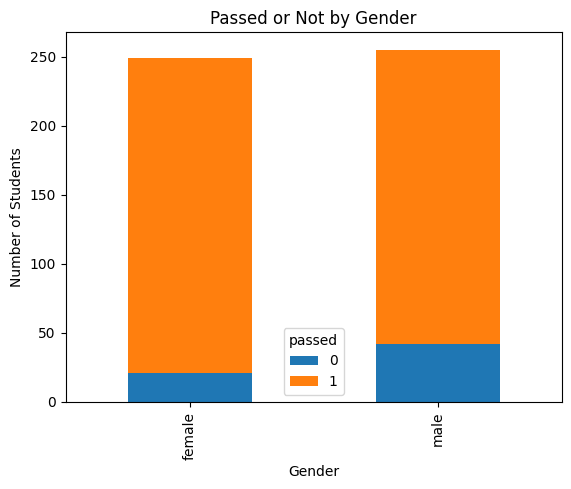

In [34]:
import matplotlib.pyplot as plt

passed_counts = df.groupby(['gender', 'passed']).size().unstack()

# Plotting the data
passed_counts.plot(kind='bar', stacked=True)

plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.title('Passed or Not by Gender')

plt.show()


In [35]:
import requests
get_result = requests.get("https://raw.githubusercontent.com/Sadeenalkhalili/project/refs/heads/main/pr.py")
if get_result:
    print(get_result.status_code)
    print(get_result.url)
    print(get_result.text)
else:
    print("URL not found (Error)")

200
https://raw.githubusercontent.com/Sadeenalkhalili/project/refs/heads/main/pr.py
import pandas as pd
 
from sklearn.preprocessing import LabelEncoder,Binarizer,MinMaxScaler,StandardScaler,normalize
 
d=pd.read_csv('StudentsPerformance (1).csv')
 
print(d)
 
df=pd.DataFrame(d)
 
print(df.dtypes)
 
print(df.describe())
 
print(df.info())
df=df.iloc[0:500,:]
import json
 
def add_students_from_json(json_file_path, df):
    try:
       
        with open(json_file_path, 'r') as file:
            students_data = json.load(file)
       
       
        new_students_df = pd.DataFrame(students_data)
       
       
        updated_df = pd.concat([df, new_students_df], ignore_index=True)
       
        return updated_df
    except FileNotFoundError:
        print(f"Error: The file {json_file_path} does not exist.")
    except json.JSONDecodeError:
        print("Error: The JSON file is not properly formatted.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
d

In [37]:
import datetime

dt3 = datetime.datetime.now()
print(f"The date and time of last edits on  the code  : {dt3}")

The date and time of editing the code  : 2025-01-11 15:49:23.338217
